<a href="https://colab.research.google.com/github/pedro-phg/python-codes/blob/main/Relat%C3%B3rio_02_topicos_computacionais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratório 02

**Nome:** Pedro Henrique Gonçalves Adalberto
**RA:** 11201921359

## Importação das Bibliotecas

In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
plt.style.use('ggplot')

### Discretização

In [2]:
#espaço
xi = 0; xf= 1; Nx = 200; x = np.linspace(xi, xf, Nx)
dx = x[1] - x[0]
L = xf - xi

#tempo
ti = 0; tf = 0.1
D = 0.1
dt = (dx**2)/(2*D)
t = np.arange(ti, tf, dt)
Nt = len(t)

### Condição Inicial

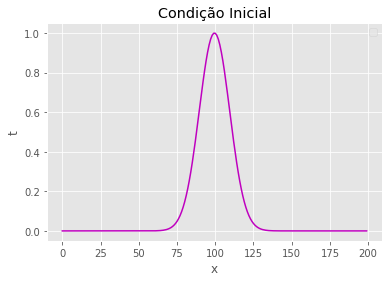

In [3]:
σ = 0.05

def C_function(x, t=0):
  return np.exp(-((x-L/2)**2)/(2*σ**2))

initialCondition = C_function(x)
plt.plot(initialCondition, color='m')
plt.xlabel('x')
plt.ylabel('t')
plt.title("Condição Inicial")
plt.legend()

# 1. Método Explícito

## 1.1. Condições de Contorno de Neumann

### Montagem da Matriz Q

In [4]:
def createATriagonalMatrix(a, b, c, k1=-1, k2=0, k3=1):
    return np.diag(a, k1) + np.diag(b, k2) + np.diag(c, k3)

R = 0.5

a = [R for i in range(Nx-3)]; b = [(1-2*R) for i in range(Nx-2)]; c = [R for i in range(Nx-3)]
Q = createATriagonalMatrix(a, b, c)
Q[0, 0] = Q[-1, -1] = R

### Encontrando a Solução do Problema

C0 = instante anterior
C = próximo instante
Q = matriz tridiagonal

In [5]:
C0 = initialCondition[1:-1]

for i in range(Nt):
  C = Q.dot(C0)
  C0 = C

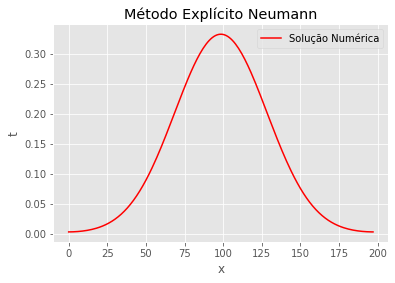

In [6]:
plt.style.use('ggplot')
plt.plot(C, label="Solução Numérica", color = 'r')
plt.xlabel('x')
plt.ylabel('t')
plt.title("Método Explícito Neumann")
plt.legend()

## 1.1. Condições de Contorno de Dirichlet

O *espaço* e o *tempo* já estão discretizados, portanto, podemos reutilizar os vetores já criados

### Criando a Matriz Q

Neste caso, pode-se reutilizar o código criado anteriormente, necessitando apenas não modificar a matriz nas posições [1, 1] e [Nx-2, Nx-2]

In [7]:
a = [R for i in range(Nx-3)]; b = [(1-2*R) for i in range(Nx-2)]; c = [R for i in range(Nx-3)]
Q = createATriagonalMatrix(a, b, c)

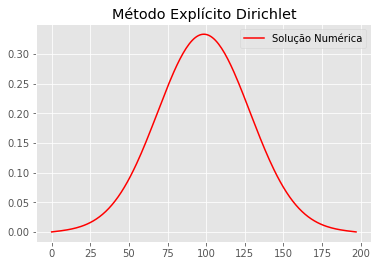

In [8]:
C0 = initialCondition[1:-1]

for i in range(Nt):
  C = Q.dot(C0)
  C0 = C

plt.plot(C, label="Solução Numérica", color = 'r')
plt.title("Método Explícito Dirichlet")
plt.legend()

# 2. Método Implícito

link com a dedução: https://drive.google.com/file/d/1w-2TEF4Nxsnj4r4BjgpXhWvpmsJT0NO_/view?usp=sharing

## 2.1. Condições de Contorno de Dirichlet

In [9]:
a = [-R for i in range(Nx-3)]; b = [(1+2*R) for i in range(Nx-2)]; c = [-R for i in range(Nx-3)]
Q = createATriagonalMatrix(a, b, c)

In [10]:
C0 = initialCondition[1:-1]

for i in range(Nt):
  C = np.linalg.solve(Q, C0)
  C0 = C

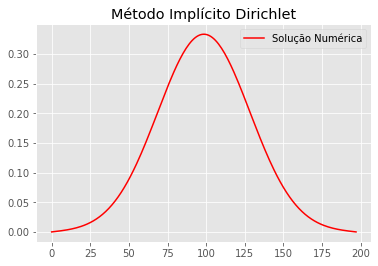

In [11]:
plt.style.use('ggplot')
plt.plot(C, label="Solução Numérica", color = 'r')
plt.title("Método Implícito Dirichlet")
plt.legend()

## 2.2. Condições de Contorno de Neumann

In [12]:
a = [-R for i in range(Nx-3)]; b = [(1+2*R) for i in range(Nx-2)]; c = [-R for i in range(Nx-3)]
Q = createATriagonalMatrix(a, b, c)
Q[0,0] = Q[-1, -1] = (1+R) 

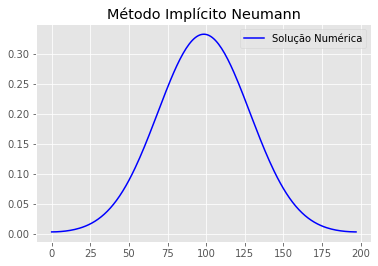

In [13]:
C0 = initialCondition[1:-1]

for i in range(Nt):
  C = np.linalg.solve(Q, C0)
  C0 = C

plt.style.use('ggplot')
plt.plot(C, label="Solução Numérica", color = 'b')
plt.title("Método Implícito Neumann")
plt.legend()

# Parte 2 - tf = 0.05

In [14]:
#espaço
xi = 0; xf= 1; Nx = 200; x = np.linspace(xi, xf, Nx)
dx = x[1] - x[0]
L = xf - xi

#tempo
ti = 0; tf = 0.05
D = 0.1
dt = (dx**2)/(2*D)
t = np.arange(ti, tf, dt)
Nt = len(t)

σ = 0.05

def C_function(x, t=0):
  return np.exp(-((x-L/2)**2)/(2*σ**2))

initialCondition = C_function(x)

## Método Explícito

### a-) Condições de Contorno de Neumann

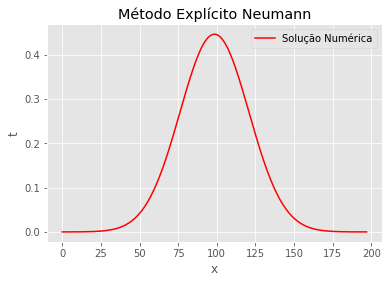

In [15]:
a = [R for i in range(Nx-3)]; b = [(1-2*R) for i in range(Nx-2)]; c = [R for i in range(Nx-3)]
Q = createATriagonalMatrix(a, b, c)
Q[0, 0] = Q[-1, -1] = R

C0 = initialCondition[1:-1]

for i in range(Nt):
  C = Q.dot(C0)
  C0 = C

plt.style.use('ggplot')
plt.plot(C, label="Solução Numérica", color = 'r')
plt.xlabel('x')
plt.ylabel('t')
plt.title("Método Explícito Neumann")
plt.legend()

### b-) Condições de Contorno de Dirichlet

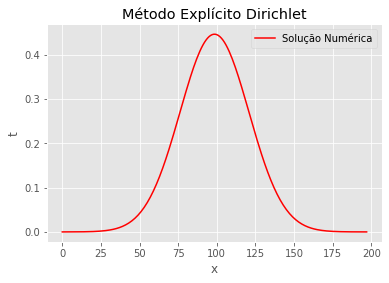

In [16]:
a = [R for i in range(Nx-3)]; b = [(1-2*R) for i in range(Nx-2)]; c = [R for i in range(Nx-3)]
Q = createATriagonalMatrix(a, b, c)

C0 = initialCondition[1:-1]

for i in range(Nt):
  C = Q.dot(C0)
  C0 = C

plt.plot(C, label="Solução Numérica", color = 'r')
plt.xlabel('x')
plt.ylabel('t')
plt.title("Método Explícito Dirichlet")
plt.legend()

## Método Implícito

### a-) Condições de Contorno de Neumann

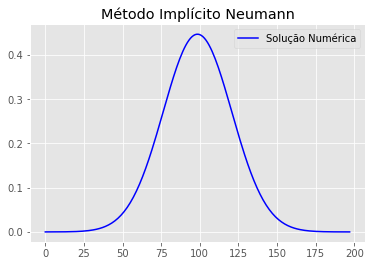

In [17]:
a = [-R for i in range(Nx-3)]; b = [(1+2*R) for i in range(Nx-2)]; c = [-R for i in range(Nx-3)]
Q = createATriagonalMatrix(a, b, c)
Q[0,0] = Q[-1, -1] = (1+R) 

C0 = initialCondition[1:-1]

for i in range(Nt):
  C = np.linalg.solve(Q, C0)
  C0 = C

plt.style.use('ggplot')
plt.plot(C, label="Solução Numérica", color = 'b')
plt.title("Método Implícito Neumann")
plt.legend()

### b-) Condições de Contorno de Dirichlet

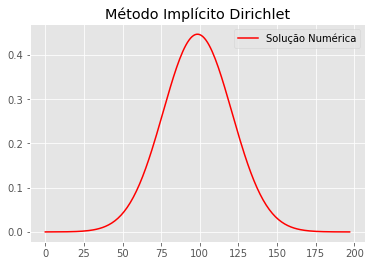

In [18]:
a = [-R for i in range(Nx-3)]; b = [(1+2*R) for i in range(Nx-2)]; c = [-R for i in range(Nx-3)]
Q = createATriagonalMatrix(a, b, c)

C0 = initialCondition[1:-1]

for i in range(Nt):
  C = np.linalg.solve(Q, C0)
  C0 = C

plt.style.use('ggplot')
plt.plot(C, label="Solução Numérica", color = 'r')
plt.title("Método Implícito Dirichlet")
plt.legend()